In [4]:
from mmseg.utils import  get_root_logger
from mmcv.utils import Config
import os.path as osp
import matplotlib.pyplot as plt
import json
import csv

In [7]:
args = {}
args["config"] = "configs/uda_rs/potsdam2isprs_uda_pt7_dw_local7_label_warm_daformer_mitb5.py"
cfg = Config.fromfile(args["config"])

In [8]:
cfg

Config (path: configs/uda_rs/potsdam2isprs_uda_pt7_dw_local7_label_warm_daformer_mitb5.py): {'log_config': {'interval': 50, 'hooks': [{'type': 'TextLoggerHook', 'by_epoch': False}]}, 'dist_params': {'backend': 'nccl'}, 'log_level': 'INFO', 'load_from': None, 'resume_from': None, 'workflow': [('train', 1)], 'cudnn_benchmark': True, 'norm_cfg': {'type': 'BN', 'requires_grad': True}, 'find_unused_parameters': True, 'model': {'type': 'EncoderDecoder', 'pretrained': 'pretrained/mit_b5.pth', 'backbone': {'type': 'mit_b5', 'style': 'pytorch'}, 'decode_head': {'type': 'DAFormerHead', 'in_channels': [64, 128, 320, 512], 'in_index': [0, 1, 2, 3], 'channels': 256, 'dropout_ratio': 0.1, 'num_classes': 6, 'norm_cfg': {'type': 'BN', 'requires_grad': True}, 'align_corners': False, 'decoder_params': {'embed_dims': 256, 'embed_cfg': {'type': 'mlp', 'act_cfg': None, 'norm_cfg': None}, 'embed_neck_cfg': {'type': 'mlp', 'act_cfg': None, 'norm_cfg': None}, 'fusion_cfg': {'type': 'aspp', 'sep': True, 'dilat

In [12]:
# timestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime())
timestamp = "20240326_183914"
cfg.work_dir = osp.join('./work_dirs', "{}_{}".format(
            timestamp, osp.splitext(osp.basename(args["config"]))[0]))
cfg.work_dir

'./work_dirs\\20240326_183914_potsdam2isprs_uda_pt7_dw_local7_label_warm_daformer_mitb5'

In [49]:
log_file = osp.join(cfg.work_dir, f'{timestamp}.log')
logger = get_root_logger(log_file=log_file, log_level=cfg.log_level)
logger.info("ceshi")
logger

2024-03-27 16:38:26,954 - mmseg - INFO - ceshi


<Logger mmseg (INFO)>

In [22]:


# 输入和输出文件的路径
input_file_path = 'work_dirs/20240326_183914_potsdam2isprs_uda_pt7_dw_local7_label_warm_daformer_mitb5/20240326_183914.log.json'
output_file_path = 'log.csv'

# 初始化一个集合来存储所有的列名
columns = set()

# 打开log.json文件并读取数据
with open(input_file_path, 'r') as f:
    json_lines = f.readlines()

# 遍历每一行数据，收集所有可能的列名
for line in json_lines[1:]:  # 从第二行开始，跳过第一行
    record = json.loads(line)
    columns.update(record.keys())

# 将列名排序，以保持一致性
columns = sorted(columns)

# 准备写入CSV文件
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=columns)
    
    # 写入列名作为CSV文件的头部
    writer.writeheader()
    
    # 再次遍历数据，这次是将数据写入CSV文件
    for line in json_lines[1:]:  # 同样，从第二行开始
        record = json.loads(line)
        writer.writerow(record)


log.csv


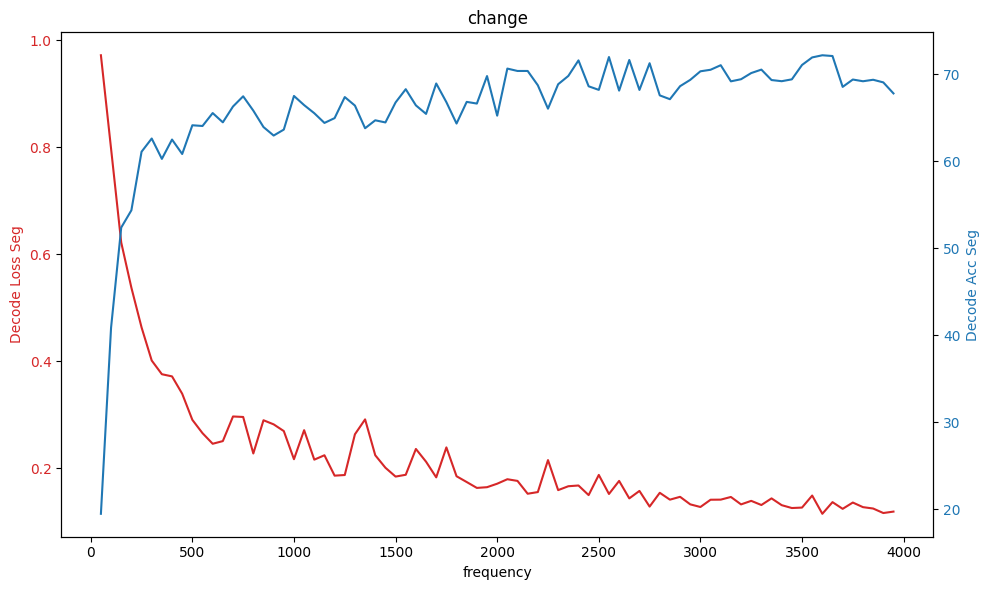

In [37]:
# 初始化存储迭代次数、decode.loss_seg值和decode.acc_seg值的列表
iters = []
decode_loss_seg_values = []
decode_acc_seg_values = []

# 读取CSV文件
with open(output_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        iter_val = row['iter']
        loss_seg_val = row['decode.loss_seg']
        acc_seg_val = row['decode.acc_seg']
        
        # 跳过空的decode.loss_seg和decode.acc_seg值
        if loss_seg_val != '' and acc_seg_val != '':
            iters.append(int(iter_val))
            decode_loss_seg_values.append(float(loss_seg_val))
            decode_acc_seg_values.append(float(acc_seg_val))

# 创建图表和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制decode.loss_seg
color = 'tab:red'
ax1.set_xlabel('frequency')
ax1.set_ylabel('Decode Loss Seg', color=color)
ax1.plot(iters, decode_loss_seg_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建共享x轴的第二个y轴
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Decode Acc Seg', color=color)
ax2.plot(iters, decode_acc_seg_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加标题和显示图表
plt.title('change')
fig.tight_layout()
plt.show()


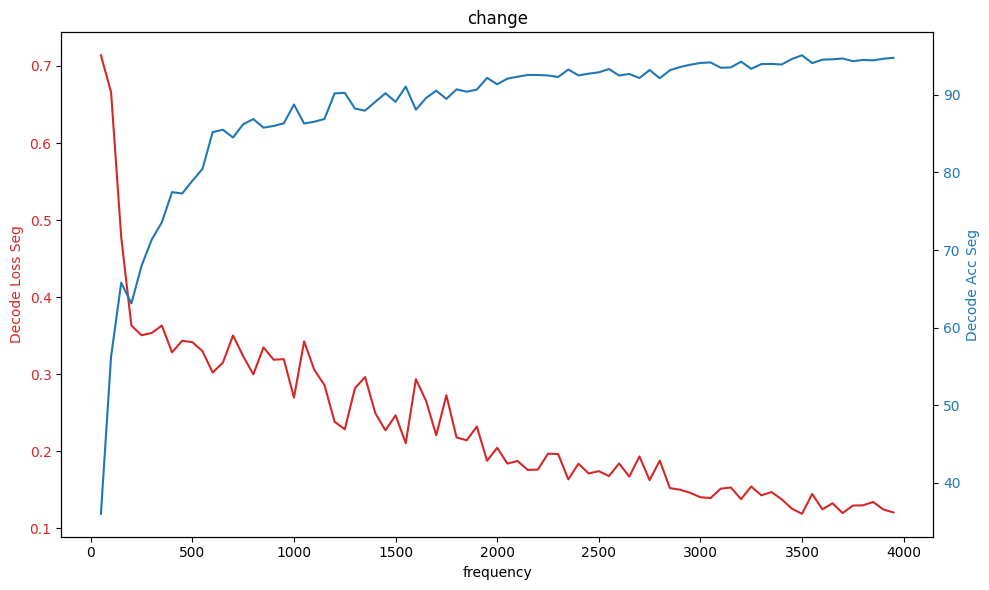

In [46]:
import matplotlib.pyplot as plt
import csv

# 设置CSV文件路径
csv_file_path = 'log.csv'

# 初始化存储迭代次数、decode.loss_seg值和decode.acc_seg值的列表
iters = []
mix_decode_loss_seg_values = []
mix_decode_acc_seg_values = []

# 读取CSV文件
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        iter_val = row['iter']
        loss_seg_val = row['mix.decode.loss_seg']
        acc_seg_val = row['mix.decode.acc_seg']
        
        # 只处理同时含有decode.loss_seg和decode.acc_seg值的数据点
        if loss_seg_val != '' and acc_seg_val != '':
            iters.append(int(iter_val))
            mix_decode_loss_seg_values.append(float(loss_seg_val))
            mix_decode_acc_seg_values.append(float(acc_seg_val))

# 创建图表和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制decode.loss_seg
color = 'tab:red'
ax1.set_xlabel('frequency')
ax1.set_ylabel('Decode Loss Seg', color=color)
ax1.plot(iters, mix_decode_loss_seg_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建共享x轴的第二个y轴
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Decode Acc Seg', color=color)
ax2.plot(iters, mix_decode_acc_seg_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加标题和显示图表
plt.title('change')
fig.tight_layout()
plt.show()

In [51]:
t = get_root_logger()
t

<Logger mmseg (INFO)>